# Module 8: LDA with SciKit Learn

* DS 5001
* Grace Lyons
* kat3ac

# Set Up

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

data_dir = '/content/drive/My Drive/DS_5001/MOD8/'

Mounted at /content/drive


## Configs

In [50]:
n_terms = 4000
n_topics = 30
max_iter = 5
#OHCO = ['book_id', 'chap_num', 'para_num']
OHCO = ['book_id']

## Imports

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [4]:
%matplotlib inline

# Prepare Data

## Convert TOKENS to table of paragraphs

Scikit Learn wants an F1 style corpus. We create onefrom our annotated TOKEN table, keeping only regular nouns.

In [51]:
TOKENS = pd.read_csv(data_dir + 'TOKEN2.csv')
TOKENS = TOKENS.rename(columns = {'chap_id': 'chap_num'})
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})

In [52]:
BOOKS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'book_str'})

In [53]:
PARAS.head()

,para_str
book_id,
105,man amusement book occupation hour consolation...
121,one infancy born heroine situation life charac...
141,years pounds luck county rank baronet lady com...
158,handsome clever home disposition blessings exi...
161,family estate residence centre property genera...


In [54]:
BOOKS.head()

,book_str
book_id,
105,man amusement book occupation hour consolation...
121,one infancy born heroine situation life charac...
141,years pounds luck county rank baronet lady com...
158,handsome clever home disposition blessings exi...
161,family estate residence centre property genera...


## Create Vector Space

We use Scikit Learn's CountVectorizer to convert our F1 corpus of paragraphs into a document-term vector space of word counts.

In [55]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [56]:
tfv2 = CountVectorizer(max_features=n_terms, stop_words='english')
tf2 = tfv.fit_transform(BOOKS.book_str)
TERMS2 = tfv.get_feature_names()

# Generate Model

We run Scikit Learn's [LatentDirichletAllocation algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and extract the THETA and PHI tables.

In [57]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [58]:
lda2 = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## THETA

In [59]:
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'

In [60]:
THETA2 = pd.DataFrame(lda2.fit_transform(tf2), index=BOOKS.index)
THETA2.columns.name = 'topic_id'

In [61]:
THETA.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1342,0.000002,0.999940,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
4045,0.000002,0.004614,0.000002,0.000002,0.000002,0.000002,0.000002,0.430513,0.000002,0.000002,0.000002,0.000002,0.019641,0.506420,0.000002,0.000002,0.000002,0.000002,0.038761,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
34970,0.000001,0.038053,0.000001,0.000001,0.002581,0.000001,0.000001,0.030433,0.000001,0.000001,0.000001,0.000001,0.003016,0.041650,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.875374,0.000001,0.000001,0.008859,0.000001,0.000001,0.000001,0.000001
161,0.000002,0.999940,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
15859,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.057110,0.000008,0.000008,0.000008,0.000008,0.000008,0.217189,0.000008,0.000008,0.000008,0.000008,0.052161,0.673343,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
141,0.000002,0.994597,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.005359,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
21816,0.000002,0.050349,0.000002,0.000002,0.761357,0.000002,0.000002,0.010803,0.000002,0.000002,0.000002,0.000002,0.000002,0.157526,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.019907,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2701,0.000001,0.000001,0.000001,0.000001,0.000148,0.000001,0.000001,0.004094,0.000001,0.000001,0.000001,0.000001,0.031093,0.000349,0.000001,0.000001,0.000001,0.000001,0.947642,0.000001,0.000001,0.000001,0.016595,0.000001,0.000001,0.000058,0.000001,0.000001,0.000001,0.000001
15422,0.000003,0.004734,0.000003,0.000003,0.000070,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.001115,0.981136,0.000003,0.000003,0.000003,0.000003,0.009321,0.000003,0.000003,0.000003,0.003550,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003


In [62]:
THETA2.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1900,0.000002,0.024262,0.000002,0.000002,0.000002,0.000002,0.000002,0.926236,0.000002,0.000002,0.000002,0.000002,0.000002,0.013724,0.000002,0.000002,0.000002,0.000002,0.000002,0.000535,0.000002,0.000002,0.031093,0.000002,0.000002,0.004105,0.000002,0.000002,0.000002,0.000002
8118,0.000002,0.026712,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.866203,0.000002,0.000002,0.000002,0.000002,0.101743,0.000002,0.000002,0.000002,0.005296,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
946,0.000011,0.999671,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
161,0.000002,0.999940,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
10712,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.602272,0.000001,0.000001,0.000001,0.000001,0.397691,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
121,0.000003,0.941271,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.007379,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.051266,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
21816,0.000002,0.050349,0.000002,0.000002,0.761357,0.000002,0.000002,0.010803,0.000002,0.000002,0.000002,0.000002,0.000002,0.157526,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.019907,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
53861,0.000003,0.037020,0.000003,0.000003,0.001547,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.835725,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.125618,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
1212,0.000011,0.933786,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.010098,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.055830,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011


## PHI

In [63]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [64]:
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abandonment,0.033333,0.033333,0.033333,0.033333,1.701174,0.033333,0.033333,0.318115,0.033333,0.033333,0.033333,0.033333,1.097425,6.077733,0.587841,0.033333,0.033333,0.033333,2.144858,0.033333,0.033333,0.033333,4.306188,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abbey,0.033333,31.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.964892,0.033333,0.033333,0.033333,0.033333,0.033333,0.101775,0.033333,0.033333,0.033333,0.033333
abhorrence,0.033333,12.567204,0.033333,0.033333,1.381133,0.033333,0.033333,8.501410,0.033333,0.033333,0.033333,0.033333,1.057931,4.597290,0.161669,0.033333,0.033333,0.033333,3.966696,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abilities,0.033333,36.195505,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,3.871162,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
aboard,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,12.969804,0.033333,0.033333,0.033333,0.033333,1.157739,11.128144,0.033333,0.033333,0.033333,0.033333,10.877646,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


In [65]:
PHI2 = pd.DataFrame(lda2.components_, columns=TERMS)
PHI2.index.name = 'topic_id'
PHI2.columns.name  = 'term_str'

In [66]:
PHI2.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abandonment,0.033333,0.033333,0.033333,0.033333,1.701174,0.033333,0.033333,0.318115,0.033333,0.033333,0.033333,0.033333,1.097425,6.077733,0.587841,0.033333,0.033333,0.033333,2.144858,0.033333,0.033333,0.033333,4.306188,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abbey,0.033333,31.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.964892,0.033333,0.033333,0.033333,0.033333,0.033333,0.101775,0.033333,0.033333,0.033333,0.033333
abhorrence,0.033333,12.567204,0.033333,0.033333,1.381133,0.033333,0.033333,8.501410,0.033333,0.033333,0.033333,0.033333,1.057931,4.597290,0.161669,0.033333,0.033333,0.033333,3.966696,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abilities,0.033333,36.195505,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,3.871162,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
aboard,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,12.969804,0.033333,0.033333,0.033333,0.033333,1.157739,11.128144,0.033333,0.033333,0.033333,0.033333,10.877646,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


# Inspect Results

## Get Top Terms per Topic

In [67]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [68]:
TOPICS2 = PHI2.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [69]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
1,time,man,day,sister,room,thing,father,mother,house,way
2,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
3,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
4,man,sir,confidence,way,friend,sort,nature,kind,cosmopolitan,stranger
5,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
6,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
7,natives,valley,time,island,house,day,place,men,islanders,water
8,abandonment,population,poetry,poets,point,points,poison,pole,poles,police


In [70]:
TOPICS2

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
1,time,man,day,sister,room,thing,father,mother,house,way
2,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
3,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
4,man,sir,confidence,way,friend,sort,nature,kind,cosmopolitan,stranger
5,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
6,abandonment,population,poetry,poets,point,points,poison,pole,poles,police
7,natives,valley,time,island,house,day,place,men,islanders,water
8,abandonment,population,poetry,poets,point,points,poison,pole,poles,police


In [71]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [72]:
TOPICS2['label'] = TOPICS2.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [73]:
TOPICS.label

topic_id
0     0 abandonment population poetry poets point po...
1               1 time man day sister room thing father
2     2 abandonment population poetry poets point po...
3     3 abandonment population poetry poets point po...
4           4 man sir confidence way friend sort nature
5     5 abandonment population poetry poets point po...
6     6 abandonment population poetry poets point po...
7          7 natives valley time island house day place
8     8 abandonment population poetry poets point po...
9     9 abandonment population poetry poets point po...
10    10 abandonment population poetry poets point p...
11    11 abandonment population poetry poets point p...
12                  12 sea time water day boat man ship
13                    13 man time men ship day way deck
14                14 hand man mind house time world day
15    15 abandonment population poetry poets point p...
16    16 abandonment population poetry poets point p...
17    17 abandonment population poetry 

In [74]:
TOPICS2.label

topic_id
0     0 abandonment population poetry poets point po...
1               1 time man day sister room thing father
2     2 abandonment population poetry poets point po...
3     3 abandonment population poetry poets point po...
4           4 man sir confidence way friend sort nature
5     5 abandonment population poetry poets point po...
6     6 abandonment population poetry poets point po...
7          7 natives valley time island house day place
8     8 abandonment population poetry poets point po...
9     9 abandonment population poetry poets point po...
10    10 abandonment population poetry poets point p...
11    11 abandonment population poetry poets point p...
12                  12 sea time water day boat man ship
13                    13 man time men ship day way deck
14                14 hand man mind house time world day
15    15 abandonment population poetry poets point p...
16    16 abandonment population poetry poets point p...
17    17 abandonment population poetry 

## Sort Topics by Doc Weight

In [75]:
TOPICS['doc_weight_sum'] = THETA.sum()

In [76]:
TOPICS2['doc_weight_sum'] = THETA2.sum()

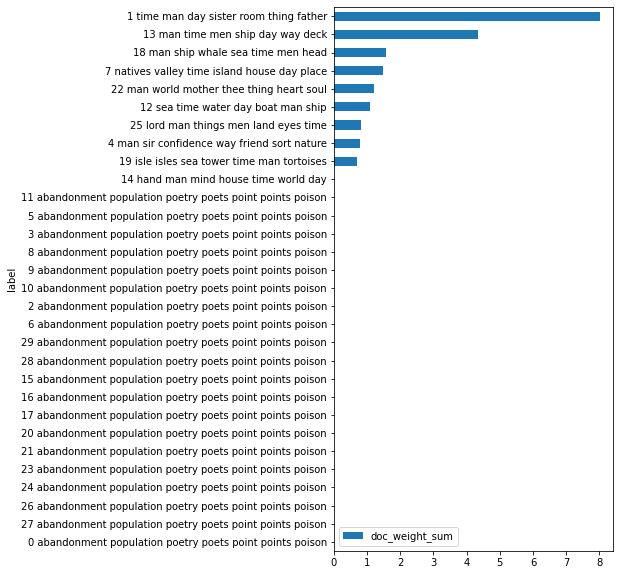

In [77]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

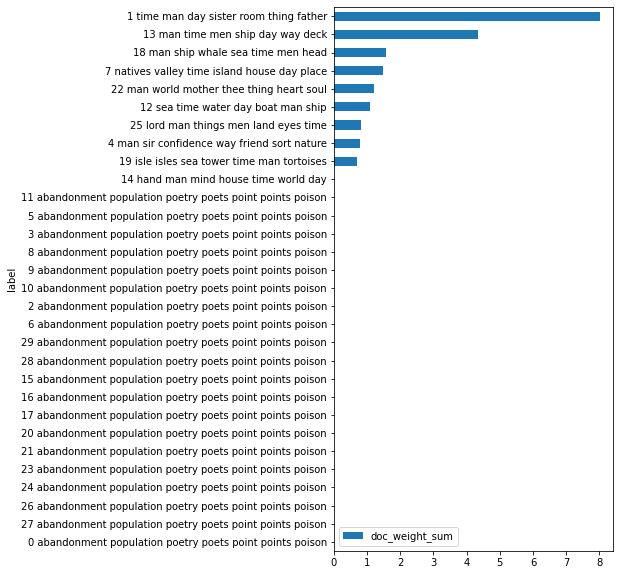

In [78]:
TOPICS2.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

## Explore Topics by Author

In [79]:
LIB = pd.read_csv(data_dir + 'LIB.csv').set_index('book_id')

In [80]:
topic_cols = [t for t in range(n_topics)]

In [81]:
AUTHORS = THETA.join(LIB, on='book_id')\
    .reset_index().set_index(['author']+OHCO)\
    .groupby('author')[topic_cols].mean()\
    .T                                            
AUTHORS.index.name = 'topic_id'

In [82]:
AUTHORS2 = THETA2.join(LIB, on='book_id')\
    .reset_index().set_index(['author']+OHCO[:1])\
    .groupby('author')[topic_cols].mean()\
    .T                                            
AUTHORS2.index.name = 'topic_id'

In [83]:
AUTHORS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [84]:
AUTHORS2['topterms'] = TOPICS2[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [85]:
AUTHORS.sort_values('melville', ascending=False).style.background_gradient()

author,austen,melville,topterms
topic_id,,,
13,0.008238,0.355517,man time men ship day way deck sailors sea night
18,0.000004,0.130026,man ship whale sea time men head boat deck way
7,0.000004,0.122173,natives valley time island house day place men islanders water
22,0.013390,0.092707,man world mother thee thing heart soul time things life
12,0.000004,0.091651,sea time water day boat man ship round hand way
25,0.000004,0.068391,lord man things men land eyes time way gods life
4,0.000004,0.065040,man sir confidence way friend sort nature kind cosmopolitan stranger
19,0.000004,0.058963,isle isles sea tower time man tortoises bell group land
1,0.978252,0.015480,time man day sister room thing father mother house way


In [86]:
AUTHORS2.sort_values('melville', ascending=False).style.background_gradient()

author,austen,melville,topterms
topic_id,,,
13,0.008238,0.355517,man time men ship day way deck sailors sea night
18,0.000004,0.130026,man ship whale sea time men head boat deck way
7,0.000004,0.122173,natives valley time island house day place men islanders water
22,0.013390,0.092707,man world mother thee thing heart soul time things life
12,0.000004,0.091651,sea time water day boat man ship round hand way
25,0.000004,0.068391,lord man things men land eyes time way gods life
4,0.000004,0.065040,man sir confidence way friend sort nature kind cosmopolitan stranger
19,0.000004,0.058963,isle isles sea tower time man tortoises bell group land
1,0.978252,0.015480,time man day sister room thing father mother house way


In [87]:
AUTHORS.sort_values('austen', ascending=False).style.background_gradient()

author,austen,melville,topterms
topic_id,,,
1,0.978252,0.015480,time man day sister room thing father mother house way
22,0.013390,0.092707,man world mother thee thing heart soul time things life
13,0.008238,0.355517,man time men ship day way deck sailors sea night
4,0.000004,0.065040,man sir confidence way friend sort nature kind cosmopolitan stranger
7,0.000004,0.122173,natives valley time island house day place men islanders water
25,0.000004,0.068391,lord man things men land eyes time way gods life
12,0.000004,0.091651,sea time water day boat man ship round hand way
18,0.000004,0.130026,man ship whale sea time men head boat deck way
19,0.000004,0.058963,isle isles sea tower time man tortoises bell group land


In [88]:
AUTHORS2.sort_values('austen', ascending=False).style.background_gradient()

author,austen,melville,topterms
topic_id,,,
1,0.978252,0.015480,time man day sister room thing father mother house way
22,0.013390,0.092707,man world mother thee thing heart soul time things life
13,0.008238,0.355517,man time men ship day way deck sailors sea night
4,0.000004,0.065040,man sir confidence way friend sort nature kind cosmopolitan stranger
7,0.000004,0.122173,natives valley time island house day place men islanders water
25,0.000004,0.068391,lord man things men land eyes time way gods life
12,0.000004,0.091651,sea time water day boat man ship round hand way
18,0.000004,0.130026,man ship whale sea time men head boat deck way
19,0.000004,0.058963,isle isles sea tower time man tortoises bell group land


In [89]:
!pip install plotly_express
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
px.scatter(AUTHORS.reset_index(), 'austen', 'melville', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

# Clutser Topics

In [45]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [46]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [47]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [48]:
labels  = ["{}: {}".format(a,b) for a, b in zip(AUTHORS.index,  AUTHORS.topterms.tolist())]

<Figure size 432x288 with 0 Axes>

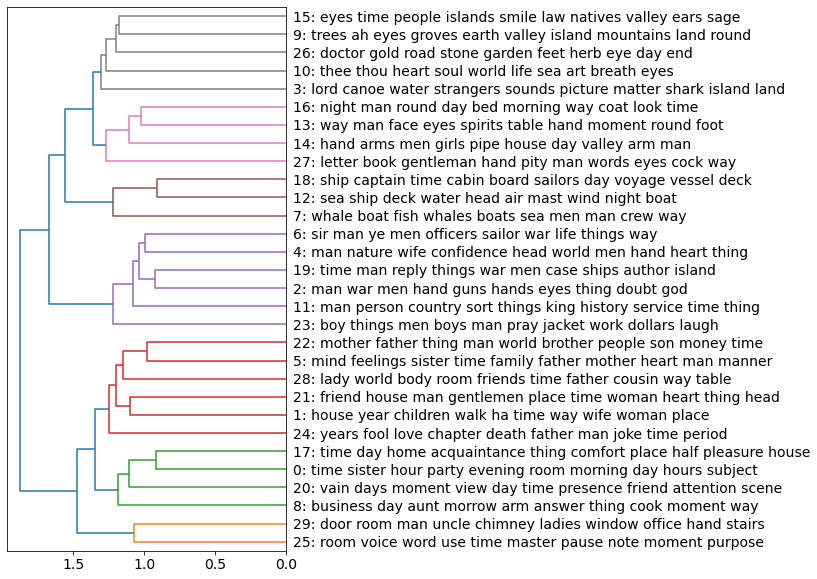

In [49]:
plot_tree(TREE, labels)

# Interpretation

When the OHCO level is paragraphs, topic 5 is most closely associated with Austen and topic 12 is most closely associated with Melville. Based on the top words it seems Austen's works are more associated to feminine words and words having to do with feelings and emotions. The top words associated with Melville's works have to do with water and the ocean and sailing. 

When the OHCO level is books, topic 1 is most closely associated with Austen and topic 13 is most closely assocaited with Melville. This time the topic 1 has words associated with both male and females. There is also no mention of emotions or feelings like there were before. Topic 13 again refences water and sailing, though they are not as harsh as the words before. 